In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

import matplotlib.pyplot as plt

from src.data_loading import load_price_data
from src.technical_indicators import add_all_indicators
from src.metrics import add_daily_returns, estimate_basic_metrics


In [ ]:
#Load NVDA Data
df = load_price_data("../data/NVDA.csv")
df.head()


,Date,Close,High,Low,Open,Volume
0,2009-01-02,0.199652,0.201027,0.184294,0.184982,497124000
1,2009-01-05,0.203319,0.207904,0.195984,0.197360,705736000
2,2009-01-06,0.210196,0.216156,0.204695,0.209279,657904000
3,2009-01-07,0.197589,0.205382,0.190483,0.205382,870096000
4,2009-01-08,0.192546,0.195067,0.180626,0.195067,1014496000


In [ ]:
#Add technical indicators
df = add_all_indicators(df)
df.head()


,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,RSI_14,MACD,MACD_signal,MACD_hist
0,2009-01-02,0.199652,0.201027,0.184294,0.184982,497124000,NaN,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,0.203319,0.207904,0.195984,0.197360,705736000,NaN,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,0.210196,0.216156,0.204695,0.209279,657904000,NaN,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,0.197589,0.205382,0.190483,0.205382,870096000,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,0.192546,0.195067,0.180626,0.195067,1014496000,NaN,NaN,NaN,NaN,NaN,NaN


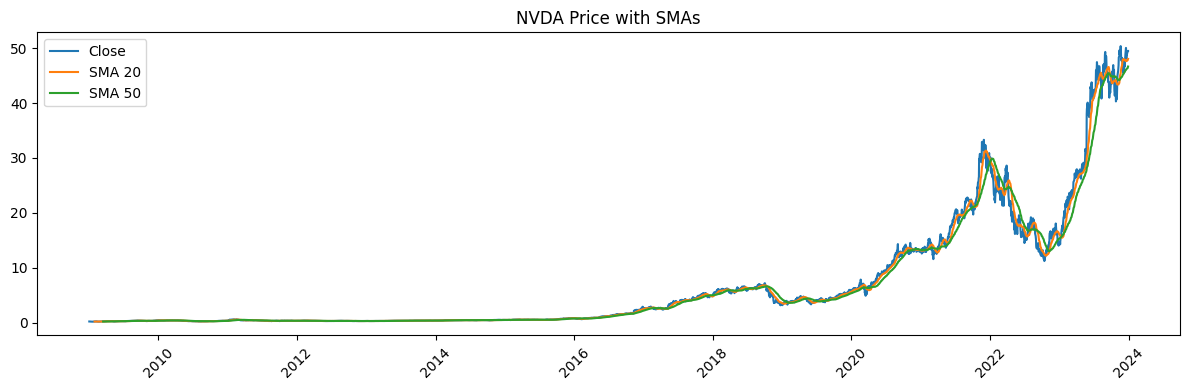

In [ ]:
#Plot Close Price and SMAs
plt.figure(figsize=(12,4))
plt.plot(df["Date"], df["Close"], label="Close")
plt.plot(df["Date"], df["SMA_20"], label="SMA 20")
plt.plot(df["Date"], df["SMA_50"], label="SMA 50")
plt.legend()
plt.title("NVDA Price with SMAs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


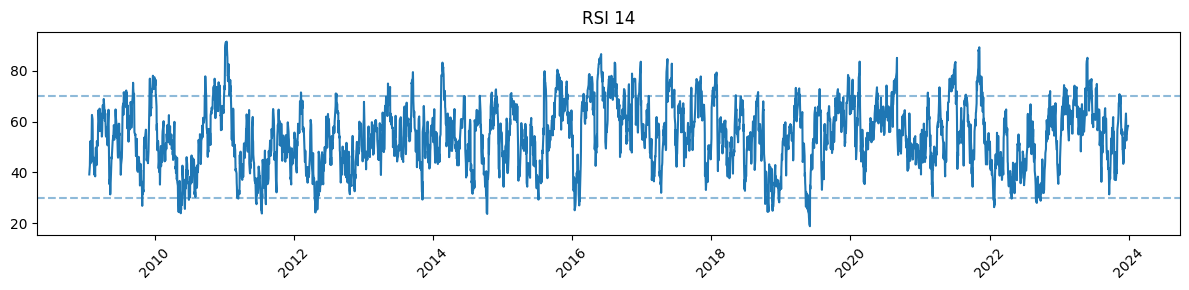

In [ ]:
#Plot RSI
plt.figure(figsize=(12,3))
plt.plot(df["Date"], df["RSI_14"])
plt.axhline(70, linestyle="--", alpha=0.5)
plt.axhline(30, linestyle="--", alpha=0.5)
plt.title("RSI 14")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


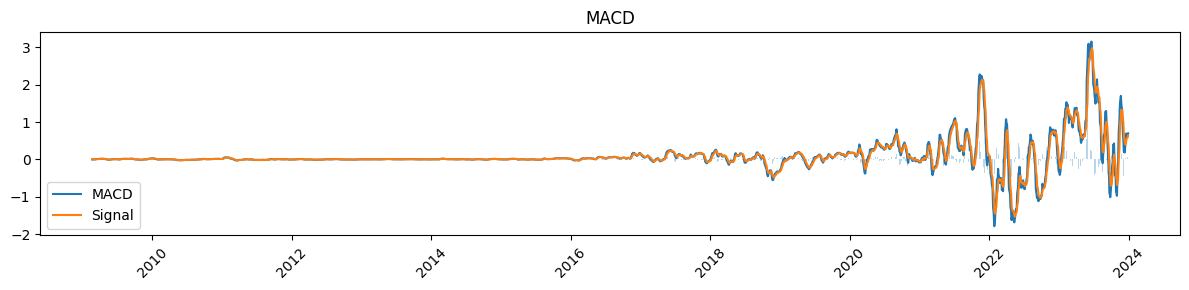

In [7]:

#Plot MACD
plt.figure(figsize=(12,3))
plt.plot(df["Date"], df["MACD"], label="MACD")
plt.plot(df["Date"], df["MACD_signal"], label="Signal")
plt.bar(df["Date"], df["MACD_hist"], alpha=0.3)
plt.legend()
plt.title("MACD")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

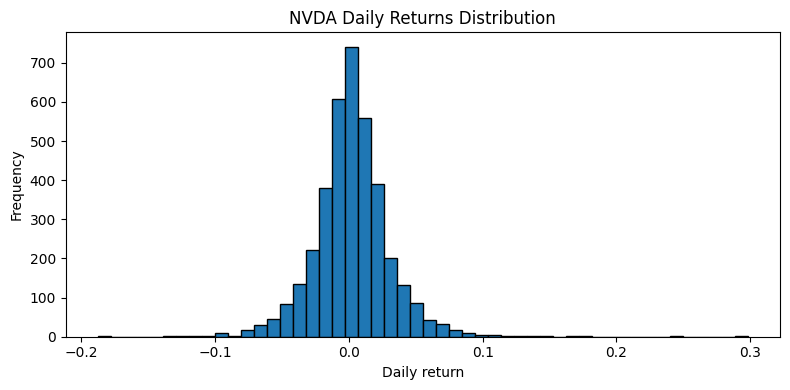

In [13]:

#  Distribution of NVDA daily returns

plt.figure(figsize=(8, 4))
df["daily_return"].dropna().plot(kind="hist", bins=50, edgecolor="black")
plt.title("NVDA Daily Returns Distribution")
plt.xlabel("Daily return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [9]:
#Add Returns & Metrics
df = add_daily_returns(df)
metrics = estimate_basic_metrics(df)

metrics

{'mean_return': np.float64(0.0018769341563542393),
 'volatility': np.float64(0.028917294429857777)}